In [1]:
%run ../config/init.py

In [2]:
xls_file = os.path.join(os.environ['DATA'], os.environ['DATASET'], '12859_2016_1457_MOESM2_ESM.xlsx')
xls_df = pandas.read_excel(xls_file, sheet_name=None, header=None);
for k in xls_df:
    if not k.startswith('int-'):
        xls_df[k].columns = xls_df[k].iloc[0]
        xls_df[k] = xls_df[k].reindex(xls_df[k].index.drop(0))

In [3]:
gene_gtf_file = "/gfs/data/genomes/Gencode/Gencode_human/GRCh37/release_19/gencode.v19.annotation_genes.gtf"
gene_gtf = pandas.read_csv(gene_gtf_file, sep='\t',header=None)
gene_gtf = gene_gtf[[9,10]]
gene_gtf = gene_gtf.rename(index=str, columns={9:'Gene_Id', 10:'gene_name'})
gene_gtf.head()

,Gene_Id,gene_name
0,ENSG00000223972.4,DDX11L1
1,ENSG00000227232.4,WASH7P
2,ENSG00000243485.2,MIR1302-11
3,ENSG00000237613.2,FAM138A
4,ENSG00000268020.2,OR4G4P


In [4]:
result_dir = os.path.join(os.environ['RESULTS'], os.environ['DATASET'], 'differential_expression')
os.chdir(result_dir)

In [5]:
dga_results = pandas.read_csv('deseq2.csv')
dga_results = dga_results[abs(dga_results['log2FoldChange']) >= 2.0]
dga_results = dga_results.merge(gene_gtf, on='Gene_Id', how='inner')
dga_results = dga_results.sort_values(by='gene_name')
print('DGA results: ' + str(len(dga_results)))
a = []
for k in xls_df:
    if k.startswith('int-'):
        c = len(xls_df[k].merge(dga_results, left_on=0, right_on='gene_name', how='inner'))   
    else:
        c = len(xls_df[k].merge(dga_results, left_on='Gene Name', right_on='gene_name', how='inner'))
    r = c/(len(xls_df[k]) - 50)
    p = c/len(dga_results)
    a.append([k,len(xls_df[k]), len(dga_results), c, r, p])
df = pandas.DataFrame(a, columns=['Reference', 'Genes in Ref', 'Genes', 'Common',  'Recall', 'Precision'])
average = df.mean(axis=0)
display(df)
df.to_csv('deseq2_corr.csv', sep='\t',index=None)
print("No. Genes: " + str(average['Common']) + " Recall: " + str(average['Recall']) + ' Precision: ' + str(average['Precision']))


DGA results: 1506


,Reference,Genes in Ref,Genes,Common,Recall,Precision
0,SAM-Frank,5796,1506,849,0.147755,0.563745
1,SAM-Haniffa,1586,1506,349,0.227214,0.231740
2,SAM-Ingersoll,4795,1506,767,0.161644,0.509296
3,SAM-Wong,2929,1506,436,0.151441,0.289509
4,limma-Frank,3931,1506,771,0.198660,0.511952
5,limma-Haniffa,1920,1506,432,0.231016,0.286853
6,limma-Ingersoll,4202,1506,797,0.191956,0.529216
7,limma-Wong,3454,1506,582,0.170975,0.386454
8,int-Frank,2803,1506,479,0.173992,0.318061
9,int-Haniffa,1178,1506,298,0.264184,0.197875


No. Genes: 552.1666666666666 Recall: 0.19111371213962194 Precision: 0.3666445329791943


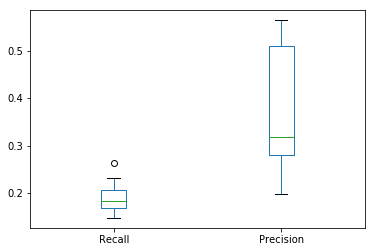

In [6]:
df[['Reference', 'Recall', 'Precision']].plot.box()

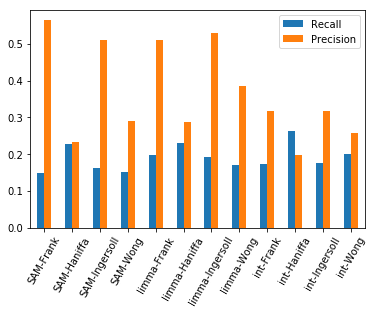

In [7]:
df[['Reference', 'Recall', 'Precision']].plot.bar().set_xticklabels(df['Reference'], rotation=60);